In [1]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [2]:
# Load the trained model 
model = torch.load('/models/run09/weights.pt')
# Set the model to evaluate mode
model.eval()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [3]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('/models/run09/log.csv')

### Training and testing loss, f1_score, auroc and IoU values for the model

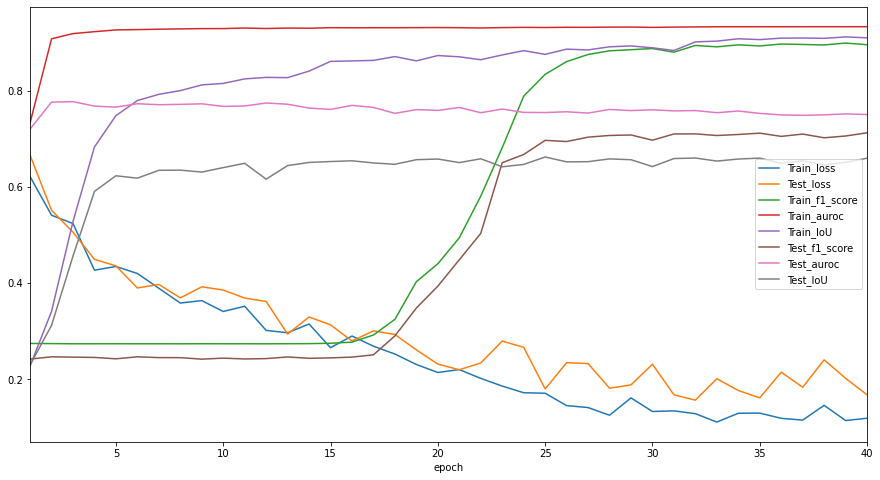

In [4]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [5]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.932700
Test_auroc     0.776907
dtype: float64


### Sample Prediction

In [6]:
ino = 810
# Read  a sample image and mask from the data-set
img = cv2.imread(f'/models/train_data/Images/{ino:03d}.jpg').transpose(2,0,1).reshape(1,3,320,640)
mask = cv2.imread(f'/models/train_data/Masks/{ino:03d}_mask.png')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([1.66143e+05, 1.41900e+03, 4.86000e+02, 3.76000e+02, 1.86000e+02,
        1.60000e+02, 1.62000e+02, 2.16000e+02, 2.64000e+02, 3.53880e+04]),
 array([0.0414517 , 0.13723978, 0.23302788, 0.32881597, 0.42460406,
        0.5203922 , 0.61618024, 0.71196836, 0.8077564 , 0.90354455,
        0.9993326 ], dtype=float32),
 <BarContainer object of 10 artists>)

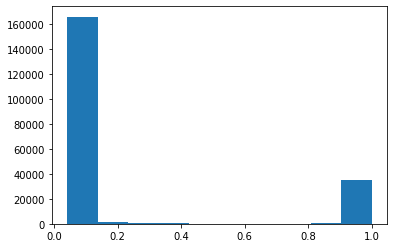

In [7]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a.data.cpu().numpy().flatten())

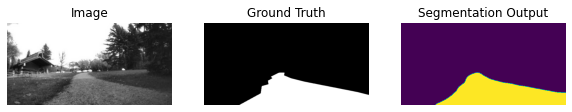

In [8]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a.cpu().detach().numpy()[0][0]>0.4);
plt.title('Segmentation Output')
plt.axis('off');
# plt.savefig('./SegmentationOutput.png',bbox_inches='tight')